In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df_hitter = pd.read_csv('df_hitter_processed.csv')

In [3]:
df_hitter.head(20)

,playerName,salary,adj_salary_filled,flag,Age,HT,WT,Bats,Throws,posit,...,SF,HBP,GDP,Bavg,Slg,obp,OPS,year,total_years_mlb,minimum_year
0,AJ Ellis,NaN,2588732.0,1,29,6-3,240,R,R,C,...,1,1,5,0.278,0.324,0.363,0.687,2010,3,400000
1,AJ Ellis,421000.0,2724640.4,0,30,6-3,240,R,R,c,...,0,3,2,0.271,0.376,0.392,0.768,2011,4,414000
2,AJ Ellis,490000.0,3171196.6,0,31,6-3,240,R,R,C,...,4,7,17,0.270,0.414,0.373,0.787,2012,5,480000
3,AJ Ellis,2000000.0,12943659.8,0,32,6-3,240,R,R,C,...,6,3,11,0.238,0.364,0.318,0.682,2013,6,480000
4,AJ Ellis,3550000.0,22974996.1,0,33,6-3,240,R,R,C,...,4,4,15,0.191,0.254,0.323,0.577,2014,7,480000
5,AJ Ellis,4250000.0,27505277.1,0,34,6-3,240,R,R,C,...,0,1,4,0.238,0.403,0.355,0.758,2015,8,507500
6,AJ Ellis,4500000.0,29123234.5,0,35,6-3,240,R,R,C,...,3,2,5,0.194,0.252,0.281,0.533,2016,9,507500
7,AJ Ellis,4500000.0,29123234.5,0,35,6-3,240,R,R,C,...,0,0,0,0.313,0.500,0.371,0.871,2016,10,507500
8,AJ Ellis,2500000.0,16179574.7,0,36,6-3,240,R,R,C,...,0,6,6,0.210,0.371,0.298,0.669,2017,11,535000
9,AJ Ellis,1250000.0,8089787.4,0,37,6-3,240,R,R,C,...,2,1,2,0.272,0.344,0.378,0.722,2018,12,545000


# Quick Look

In [5]:
df_hitter.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,5047.0,3.985227e+06,5.454785e+06,125000.0,510200.000,1150000.000,5.318750e+06,34083333.0
adj_salary_filled,6924.0,1.967499e+07,3.176493e+07,808978.7,3235914.900,3591865.600,2.045098e+07,220581533.5
flag,6924.0,2.710861e-01,4.445525e-01,0.0,0.000,0.000,1.000000e+00,1.0
Age,6924.0,2.820003e+01,3.984731e+00,19.0,25.000,28.000,3.100000e+01,45.0
WT,6924.0,1.908144e+02,2.063684e+01,140.0,175.000,190.000,2.050000e+02,287.0
G,6924.0,7.255748e+01,5.109214e+01,1.0,24.000,66.000,1.190000e+02,162.0
AB,6924.0,2.325962e+02,1.944957e+02,0.0,56.000,181.500,3.942500e+02,684.0
R,6924.0,3.046490e+01,2.903521e+01,0.0,6.000,21.000,4.925000e+01,137.0
H,6924.0,5.985269e+01,5.442881e+01,0.0,12.000,43.000,1.000000e+02,225.0
Dbl,6924.0,1.189341e+01,1.143654e+01,0.0,2.000,8.000,2.000000e+01,56.0


In [6]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playerName         6924 non-null   object 
 1   salary             5047 non-null   float64
 2   adj_salary_filled  6924 non-null   float64
 3   flag               6924 non-null   int64  
 4   Age                6924 non-null   int64  
 5   HT                 6924 non-null   object 
 6   WT                 6924 non-null   int64  
 7   Bats               6924 non-null   object 
 8   Throws             6924 non-null   object 
 9   posit              6924 non-null   object 
 10  borndate           6924 non-null   object 
 11  Place              6924 non-null   object 
 12  teamName           6924 non-null   object 
 13  LeagueAbbr         6924 non-null   object 
 14  G                  6924 non-null   int64  
 15  AB                 6924 non-null   int64  
 16  R                  6924 

# Distribution of Salaries

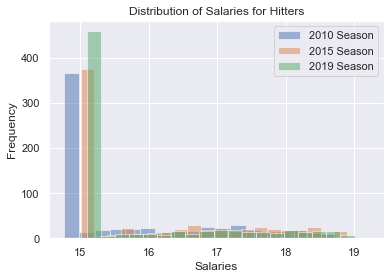

In [7]:
x = np.log(df_hitter['adj_salary_filled'][df_hitter['year'] == 2010])
y = np.log(df_hitter['adj_salary_filled'][df_hitter['year'] == 2015])
z = np.log(df_hitter['adj_salary_filled'][df_hitter['year'] == 2019])

_ = plt.hist(x, bins=20, alpha=0.5, label='2010 Season')
_ = plt.hist(y, bins=20, alpha=0.5, label='2015 Season')
_ = plt.hist(z, bins=20, alpha=0.5, label='2019 Season')
_ = plt.xlabel('Salaries')
_ = plt.ylabel('Frequency')
_ = plt.legend()
_ = plt.title('Distribution of Salaries for Hitters')
_ = plt.show()

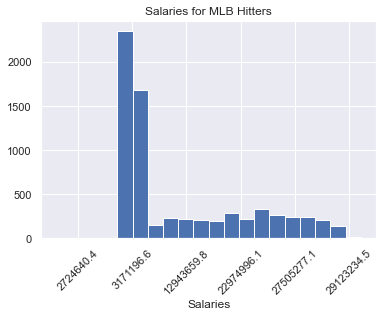

In [8]:
f, ax = plt.subplots()
x = (df_hitter['adj_salary_filled'])
ax.hist(np.log(df_hitter['adj_salary_filled']), bins=20)
ax.set_xticklabels(x)
plt.xlabel('Salaries')
plt.xticks(rotation=45)

plt.title('Salaries for MLB Hitters')
plt.show()

# Plotting Correlation Matrix

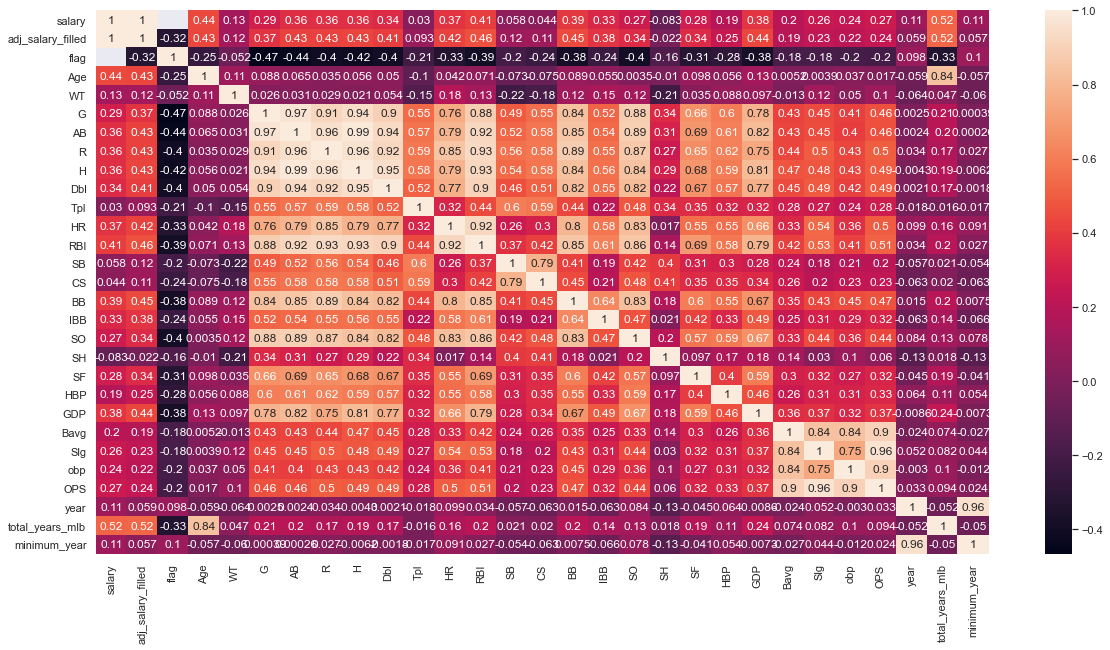

In [9]:
plt.figure(figsize=(20,10))
cor= df_hitter.corr()
sns.heatmap(cor,annot=True)

In [10]:
#Correlation with output variable
cor_target = abs(cor["adj_salary_filled"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

salary               1.000000
adj_salary_filled    1.000000
flag                 0.315781
Age                  0.433457
G                    0.374448
AB                   0.426127
R                    0.426275
H                    0.429633
Dbl                  0.407866
HR                   0.423042
RBI                  0.463561
BB                   0.447756
IBB                  0.377933
SO                   0.343339
SF                   0.344241
GDP                  0.438088
total_years_mlb      0.524767
Name: adj_salary_filled, dtype: float64

# Independent Variables Vs. Dependant Variable Scatter Plots

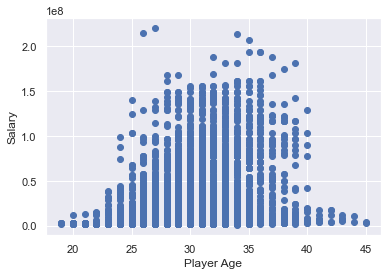

In [11]:
plt.scatter(df_hitter['Age'], df_hitter['adj_salary_filled'])
plt.xlabel('Player Age')
plt.ylabel('Salary')
plt.show()

# Years in MLB vs Salary

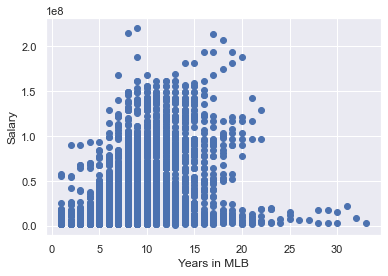

In [12]:
plt.scatter(df_hitter['total_years_mlb'], df_hitter['adj_salary_filled'])
plt.xlabel('Years in MLB')
plt.ylabel('Salary')
plt.show()

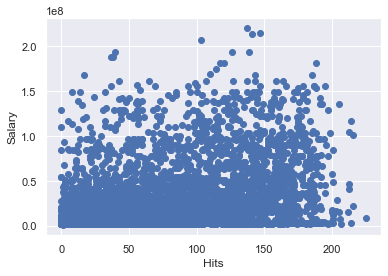

In [13]:
plt.scatter(df_hitter['H'], df_hitter['adj_salary_filled'])
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

# HR(Home Runs) vs. Salary

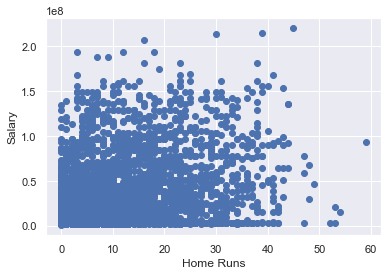

In [14]:
plt.scatter(df_hitter['HR'], df_hitter['adj_salary_filled'])
plt.xlabel('Home Runs')
plt.ylabel('Salary')
plt.show()

# RBI(Runs Batted In) vs. Salary

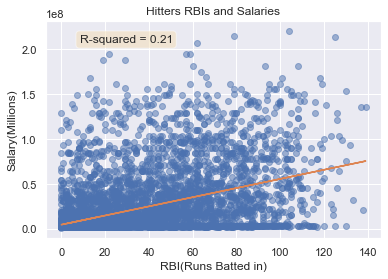

In [15]:
correlation_matrix = np.corrcoef(df_hitter['RBI'], df_hitter['adj_salary_filled'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

x = df_hitter['RBI'].values
y = df_hitter['adj_salary_filled'].values

plt.plot(x, y, 'o',alpha=.5)
plt.xlabel('RBI(Runs Batted in)')
plt.ylabel('Salary(Millions)')
plt.title('Hitters RBIs and Salaries')
m, b = np.polyfit(x, y, 1)
plt.text(.1, .90, 'R-squared = %0.2f' % r_squared, fontsize=12, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.plot(x, m*x + b)
plt.show()

# Categorical Data vs Target Variable Plots

# Average Salary by Position

Text(0, 0.5, 'Salary')

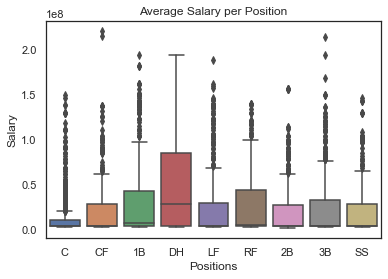

In [16]:
#create plot for salary by position
positions = df_hitter[df_hitter['posit'].isin(['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH'])]
sns.set_style("white")
sns.boxplot(x = 'posit', y = 'adj_salary_filled', data = positions)
plt.title('Average Salary per Position')
plt.xlabel('Positions')
plt.ylabel('Salary')

# Average Salary per Hitter Side

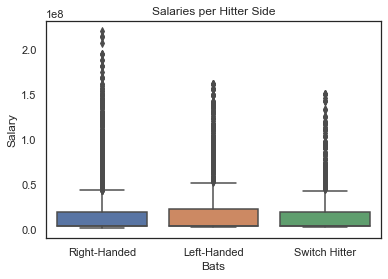

In [17]:
labels = ['Right-Handed', 'Left-Handed', 'Switch Hitter']
positions = (0, 1, 2)
sns.boxplot(x = 'Bats', y = 'adj_salary_filled', data = df_hitter)
sns.set_style("white")
plt.title('Salaries per Hitter Side')
plt.ylabel('Salary')
plt.xticks(positions ,labels)
plt.show()

# From a hitters perspective what team pays the most?

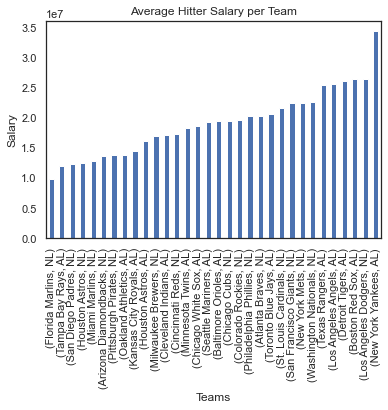

In [18]:

df3 = df_hitter.groupby(['teamName', 'LeagueAbbr'])['adj_salary_filled'].mean().sort_values()
df3.plot.bar()
plt.title('Average Hitter Salary per Team')
plt.ylabel('Salary')
plt.xlabel('Teams')
plt.show()